In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering

In [2]:
df_data = pd.read_csv('学生频次数据_带标签_归一化.csv')
df_data = df_data.iloc[:, [x for x in range(1, int(df_data.shape[1]))]]
df_data

,Anon Student Id,Answer,Axes,Vector,Choose-Principle,Choose-Sought,Equation,Explain-Further,NextStepHelp,Variable,Whats-Wrong,Solve,labels
0,Stu_11eed491c49d08923078a99c3689faa6,0.345992,0.579545,0.343166,0.548673,0.620968,0.215619,0.664640,0.607702,0.398374,0.267442,0.536765,0
1,Stu_16d36e81d1d34630d27d8fd8b9d99d53,0.417722,0.647727,0.506391,0.681416,0.701613,0.301313,1.000000,0.984356,0.574526,0.143411,0.595588,2
2,Stu_1712d2d13ed773fddf0c9a59ad099b21,0.000000,0.034091,0.013766,0.000000,0.000000,0.000000,0.003274,0.001203,0.000000,0.015504,0.000000,1
3,Stu_18d58be83dc070054ca65038cc2293b4,0.291139,0.386364,0.153392,0.292035,0.250000,0.107809,0.300281,0.297232,0.184282,0.131783,0.191176,0
4,Stu_1a24bc4f1db0936c28f45176d3c425a7,0.063291,0.454545,0.227139,0.407080,0.338710,0.319281,0.203929,0.297232,0.433604,0.356589,0.213235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Stu_f8258e6b33109ea4808c004915145dd2,0.345992,0.659091,0.434612,0.557522,0.637097,0.702142,0.325538,0.432010,0.615176,0.240310,0.830882,0
65,Stu_fa1d7f2f99f036137482fbc04bab625b,0.877637,0.443182,0.262537,0.451327,0.362903,0.198341,0.607577,0.547533,0.276423,0.193798,0.466912,0
66,Stu_fb6121b7f70cc8dc2dca6a97e2c7cdc5,0.426160,0.636364,0.345133,0.663717,0.620968,0.697305,0.541628,0.664260,0.644986,0.228682,0.761029,0
67,Stu_fd75420a601b7a43d13ea33ce657a2e1,0.459916,0.045455,0.032448,0.000000,0.000000,0.003455,0.008887,0.003610,0.016260,0.085271,0.000000,1


In [3]:
# 测试行为1：8个行为
df_data_matrix = np.array(df_data.loc[:, ['Axes', 'Variable', 'Answer', 'Equation', 'Solve', 'Choose-Principle', 'Whats-Wrong', 'Explain-Further']])

print(df_data_matrix.shape)
print(df_data_matrix)

(69, 8)
[[5.79545455e-01 3.98373984e-01 3.45991561e-01 2.15618521e-01
  5.36764706e-01 5.48672566e-01 2.67441860e-01 6.64639850e-01]
 [6.47727273e-01 5.74525745e-01 4.17721519e-01 3.01313062e-01
  5.95588235e-01 6.81415929e-01 1.43410853e-01 1.00000000e+00]
 [3.40909090e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.55038760e-02 3.27408800e-03]
 [3.86363636e-01 1.84281843e-01 2.91139241e-01 1.07809261e-01
  1.91176471e-01 2.92035398e-01 1.31782946e-01 3.00280636e-01]
 [4.54545455e-01 4.33604336e-01 6.32911390e-02 3.19281272e-01
  2.13235294e-01 4.07079646e-01 3.56589147e-01 2.03928906e-01]
 [1.70454545e-01 2.71002710e-02 2.70042194e-01 4.76848650e-02
  4.77941180e-02 0.00000000e+00 3.48837210e-02 2.80636100e-03]
 [2.27272730e-02 2.71002700e-03 0.00000000e+00 7.60193500e-03
  3.67647100e-03 0.00000000e+00 1.55038760e-02 4.67727000e-04]
 [9.09090910e-02 0.00000000e+00 3.29113924e-01 2.00414650e-02
  4.04411760e-02 0.00000000e+00 3.87596900e-03 1.403181

In [10]:

# 测试行为3：9个行为
#df_data_matrix = np.array(df_data.loc[:, ['Axes', 'Vector', 'Variable', 'Answer', 'Equation', 'Choose-Principle', 'Whats-Wrong', 'Explain-Further', 'NextStepHelp']])
#'Answer','Axes','Choose-Principle','Choose-Sought','Equation','Explain-Further','NextStepHelp','Variable','Whats-Wrong'

#print(df_data_matrix.shape)
#print(df_data_matrix)

(69, 9)
[[3.44537815e-01 5.79545455e-01 5.48672566e-01 6.20967742e-01
  2.15469613e-01 6.64639850e-01 6.07701564e-01 3.98373984e-01
  2.67441860e-01]
 [4.20168067e-01 6.47727273e-01 6.81415929e-01 7.01612903e-01
  3.01795580e-01 1.00000000e+00 9.84356197e-01 5.74525745e-01
  1.43410853e-01]
 [0.00000000e+00 3.40909091e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.27408793e-03 1.20336943e-03 0.00000000e+00
  1.55038760e-02]
 [2.89915966e-01 3.86363636e-01 2.92035398e-01 2.50000000e-01
  1.08425414e-01 3.00280636e-01 2.97232250e-01 1.84281843e-01
  1.31782946e-01]
 [6.30252101e-02 4.54545455e-01 4.07079646e-01 3.38709677e-01
  3.19751381e-01 2.03928906e-01 2.97232250e-01 4.33604336e-01
  3.56589147e-01]
 [2.68907563e-01 1.70454545e-01 0.00000000e+00 0.00000000e+00
  4.76519337e-02 2.80636109e-03 1.20336943e-03 2.71002710e-02
  3.48837209e-02]
 [0.00000000e+00 2.27272727e-02 0.00000000e+00 0.00000000e+00
  7.59668508e-03 4.67726848e-04 1.20336943e-03 2.71002710e-03
  1.55038760e-02

In [28]:
# 测试行为2：9个行为
df_data_matrix = np.array(df_data.loc[:, ['Whats-Wrong','Vector','Choose-Sought','Solve','Choose-Principle','Equation','Answer','Axes','Variable'
]])
#,,,,,,'NextStepHelp','Solve'
print(df_data_matrix.shape)
print(df_data_matrix)

(69, 9)
[[0.26744186 0.34316618 0.62096774 0.53676471 0.54867257 0.21561852
  0.34599156 0.57954545 0.39837398]
 [0.14341085 0.50639135 0.7016129  0.59558824 0.68141593 0.30131306
  0.41772152 0.64772727 0.57452574]
 [0.01550388 0.01376598 0.         0.         0.         0.
  0.         0.03409091 0.        ]
 [0.13178295 0.15339233 0.25       0.19117647 0.2920354  0.10780926
  0.29113924 0.38636364 0.18428184]
 [0.35658915 0.22713864 0.33870968 0.21323529 0.40707965 0.31928127
  0.06329114 0.45454545 0.43360434]
 [0.03488372 0.07079646 0.         0.04779412 0.         0.04768486
  0.27004219 0.17045455 0.02710027]
 [0.01550388 0.01081613 0.         0.00367647 0.         0.00760193
  0.         0.02272727 0.00271003]
 [0.00387597 0.00688299 0.         0.04044118 0.         0.02004147
  0.32911392 0.09090909 0.        ]
 [0.41860465 0.36479843 0.5        0.69852941 0.57522124 0.32757429
  0.36708861 0.65909091 0.58265583]
 [0.31395349 0.29596853 0.71774194 0.51470588 0.65486726 0.25570

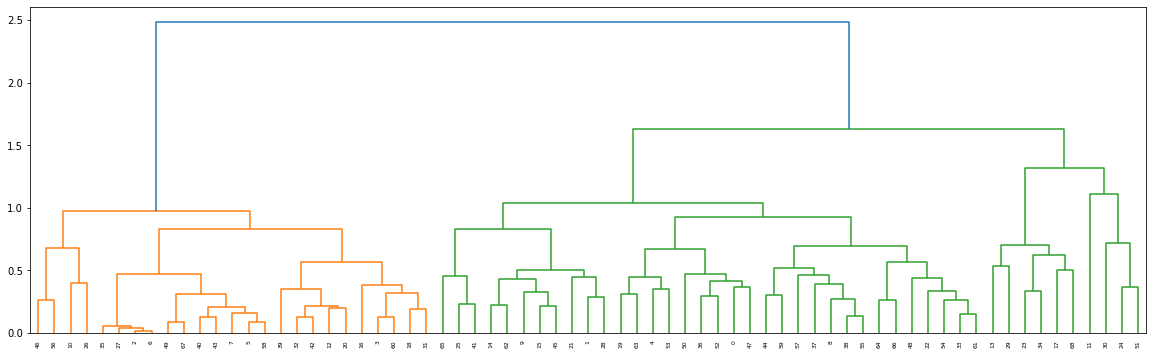

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline

#绘制树状图

plt.figure(figsize=(20,6))
#'ward', 'complete', 'average', 
Z = linkage(df_data_matrix, method='complete', metric='euclidean')

p = dendrogram(Z, 0)
# plt.show()

In [22]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
ac.fit(df_data_matrix)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None, n_clusters=3,
            )

#聚类
labels = ac.fit_predict(df_data_matrix)
print(labels)

[0 0 1 0 0 1 1 1 0 0 1 2 1 2 0 0 0 2 1 0 1 0 0 0 2 0 1 1 0 2 0 1 1 0 0 1 0
 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 2]


In [34]:
# 将分类的学生的结果列加入到df_data中
df_data['labels'] = labels
df_data.to_csv('学生频次数据_带标签_归一化.csv')
df_data

,Unnamed: 0,Anon Student Id,Answer,Axes,Choose-Principle,Choose-Sought,Equation,Explain-Further,NextStepHelp,Variable,Whats-Wrong,labels
0,0,Stu_11eed491c49d08923078a99c3689faa6,0.345992,0.579545,0.548673,0.620968,0.215619,0.664640,0.607702,0.398374,0.267442,0
1,0,Stu_16d36e81d1d34630d27d8fd8b9d99d53,0.417722,0.647727,0.681416,0.701613,0.301313,1.000000,0.984356,0.574526,0.143411,2
2,0,Stu_1712d2d13ed773fddf0c9a59ad099b21,0.000000,0.034091,0.000000,0.000000,0.000000,0.003274,0.001203,0.000000,0.015504,1
3,0,Stu_18d58be83dc070054ca65038cc2293b4,0.291139,0.386364,0.292035,0.250000,0.107809,0.300281,0.297232,0.184282,0.131783,0
4,0,Stu_1a24bc4f1db0936c28f45176d3c425a7,0.063291,0.454545,0.407080,0.338710,0.319281,0.203929,0.297232,0.433604,0.356589,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64,0,Stu_f8258e6b33109ea4808c004915145dd2,0.345992,0.659091,0.557522,0.637097,0.702142,0.325538,0.432010,0.615176,0.240310,0
65,0,Stu_fa1d7f2f99f036137482fbc04bab625b,0.877637,0.443182,0.451327,0.362903,0.198341,0.607577,0.547533,0.276423,0.193798,0
66,0,Stu_fb6121b7f70cc8dc2dca6a97e2c7cdc5,0.426160,0.636364,0.663717,0.620968,0.697305,0.541628,0.664260,0.644986,0.228682,0
67,0,Stu_fd75420a601b7a43d13ea33ce657a2e1,0.459916,0.045455,0.000000,0.000000,0.003455,0.008887,0.003610,0.016260,0.085271,1
